In [497]:
import numpy as np
import pandas as pd

In [498]:
df = pd.read_csv("C:\\Users\\Dax\\Downloads\\heart_disease_data.csv")

In [499]:
import seaborn as sns
import matplotlib.pyplot as plt

In [500]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [502]:
df.shape

(303, 14)

In [503]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

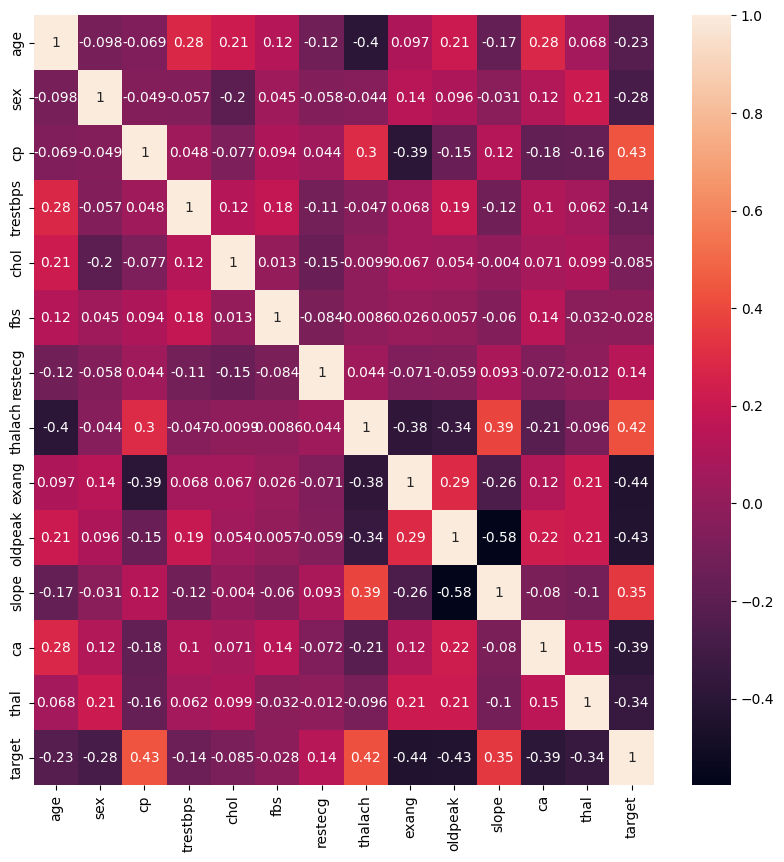

In [504]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [505]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [506]:
y = df['target']

In [507]:
x=df.drop(['target','oldpeak','exang'],axis=1)

In [508]:
from sklearn.model_selection import train_test_split

In [509]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [510]:
from sklearn.linear_model import LogisticRegression

In [511]:
lr = LogisticRegression()

In [512]:
lr.fit(x_train,y_train)

C:\Users\Dax\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [513]:
lr.score(x_train,y_train)

0.8471074380165289

In [514]:
lr.score(x_test,y_test)

0.8524590163934426

In [515]:
from sklearn.preprocessing import StandardScaler

In [516]:
sc = StandardScaler()

In [517]:
x_train_sc = sc.fit_transform(x_train)

In [518]:
x_test_sc = sc.transform(x_test)

In [519]:
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [520]:
lr.score(x_train_sc,y_train)

0.8429752066115702

In [521]:
lr.score(x_test_sc,y_test)

0.8524590163934426

In [522]:
from sklearn.neighbors import KNeighborsClassifier

In [523]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [524]:
knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [525]:
knn.score(x_train_sc,y_train)

0.859504132231405

In [526]:
knn.score(x_test_sc,y_test)

0.8688524590163934

In [527]:
from sklearn.ensemble import RandomForestClassifier

In [528]:
rf = RandomForestClassifier(n_estimators=100)

In [529]:
rf.fit(x_train_sc,y_train)

RandomForestClassifier()

In [530]:
rf.score(x_test_sc,y_test)

0.8360655737704918

In [531]:
rf.score(x_test_sc,y_test)

0.8360655737704918

In [532]:
from sklearn.decomposition import PCA

In [533]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

import pandas as pd
columns = [f'PC{i+1}' for i in range(x_train_pca.shape[1])]
x_train_pca_ = pd.DataFrame(x_train_pca, columns=columns, index=x_train.index)
x_test_pca_ = pd.DataFrame(x_test_pca, columns=columns, index=x_test.index)


In [534]:
lr.fit(x_train_pca_,y_train)

LogisticRegression()

In [535]:
lr.score(x_train_pca_,y_train)

0.8429752066115702

In [536]:
lr.score(x_test_pca_,y_test)

0.8524590163934426

In [537]:
knn.fit(x_train_pca_,y_train)

KNeighborsClassifier()

In [538]:
knn.score(x_train_pca_,y_train)

0.859504132231405

In [539]:
knn.score(x_test_pca_,y_test)

0.8688524590163934

In [540]:
rf.fit(x_train_pca_,y_train)

RandomForestClassifier()

In [541]:
rf.score(x_train_pca_,y_train)

1.0

In [542]:
rf.score(x_test_pca_,y_test)

0.8688524590163934